<a href="https://colab.research.google.com/github/suraj3004200/ML-DL-projects/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE CLASSIFICATION**

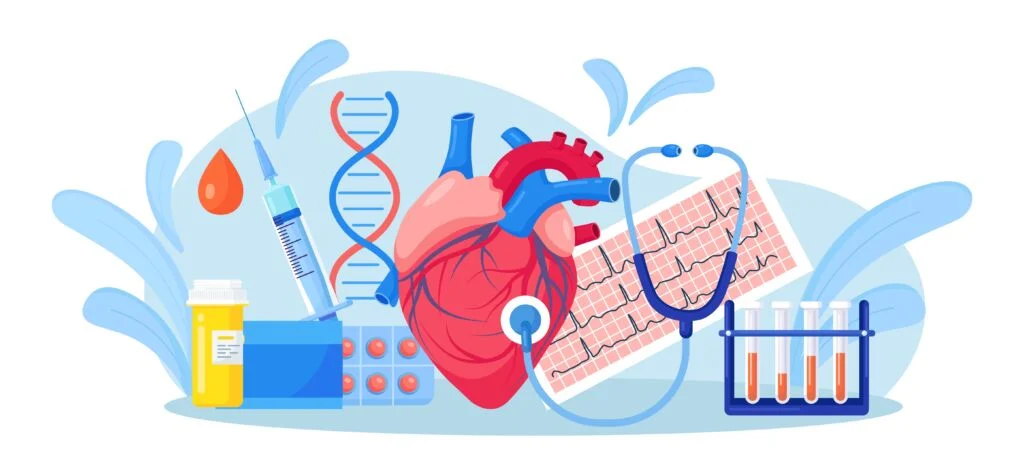

# Predicting heart disease using machine learning

This notebook looks into using various python-based learning and data science libraraies

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition


> given clinical paramemters about a patient, can we predict whether or not they have a heart disease

## 2. Data
> The original data is used from kaggle

## 3. Evaluation

> If we can get good accuracy at prediction whether or not a patient has heart disease during the proof of concept , we' ll pursue the project

## 4. Features

> This is where you'll get different information about each of the features in your data.


# About the dataset
> ### Classification Dataset for heart disease prediction
> ### Datatset link : https://www.kaggle.com/datasets/abhishek14398/heart-disease-classification
> ### Columns

>* age - age of the person (in years)

>* sex - gender of the person (1 = male; 0 = female)

>* chest_pain_type - type of the chest pain

>>* Value 0: typical angina

>>* Value 1: atypical angina

>>* Value 2: non-anginal pain

>>* Value 3: asymptomatic

>* resting_bp - blood pressure while resting (in mm Hg on admission to the hospital)

>* cholesterol - A person's serum cholesterol in mg/dl

>* fasting_blood_sugar - Blood sugar while fasting & [ > 120 mg/dl ] (1 = true; 0 = false)

>* restecg - ECG (electrocardiographic ) while resting

>>* Value 0: normal

>>* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

>>* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

>* max_hr - Maximum heart rate achieved

>* exang - exercise-induced angina (1 = yes; 0 = no)
Exercise-induced angina (AP) is a common complaint of cardiac patients, particularly when exercising in the cold. It usually happens during activity (exertion) and goes away with rest or angina medication. For example, pain, when walking uphill or in cold weather, maybe angina. Stable angina pain is predictable and usually similar to previous episodes of chest pain.

>* oldpeak - ST depression induced by exercise relative to rest
Exercise-induced ST segment depression is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis. ST-segment depression is believed as a common electrocardiographic sign of myocardial ischemia during exercise testing. Ischemia is generally defined as oxygen deprivation due to reduced perfusion. ST segment depression less than 0.5 mm is accepted in all leads. ST segment depression 0.5 mm or more is considered pathological.

>* slope - the slope of the peak exercise ST segment

>>* Value 0: upsloping

>>* Value 1: flat

>>* Value 2: downsloping

>* num_major_vessels - no. of major vessels (0-3) colored by flourosopy

>* thal - thalassemia

>>* 0: normal

>>* 1: fixed defect

>>* 2: reversable defect

>>> People with thalassemia can get too much iron in their bodies, either from the disease or from frequent blood transfusions. Too much iron can result in damage to your heart, liver & endocrine system, which includes hormone-producing glands that regulate processes throughout your body.

>* target -

>>* 0 = no disease
>>* 1 = disease

## Preparing the tools

We're going to use pandas, Matplotliib and numpy for data analysis and visualisation


In [ ]:
!pip install seaborn

In [ ]:
# Importing all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from sickitlearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Mdoels evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Pregrad/heart-disease.csv'


In [ ]:
df = pd.read_csv(file_path,encoding="utf-8")
df.shape

(303, 14)

## Data exploration or  EDA


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#lets find out the all classes
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

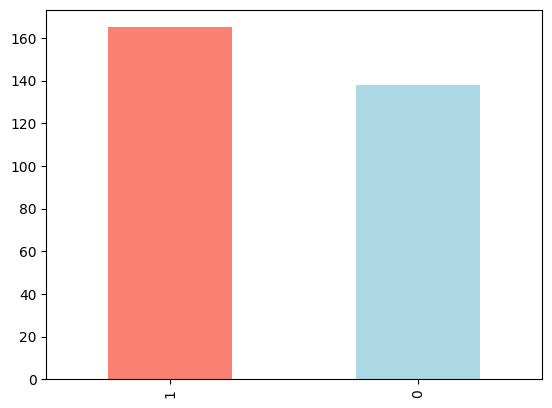

In [ ]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon","lightblue"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#looking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# Compare target columns to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


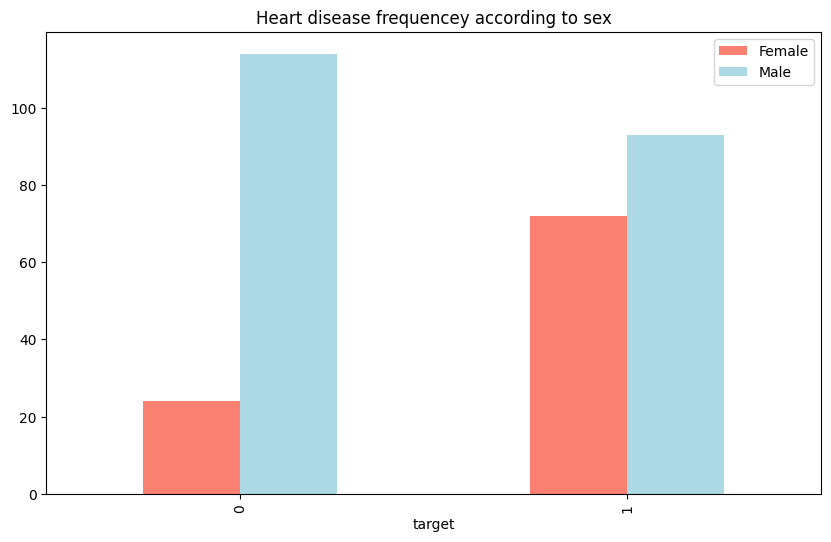

In [ ]:
# creating a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize =(10,6),color = ["salmon","lightblue"])
plt.title("Heart disease frequencey according to sex")
plt.legend(["Female","Male"])


### age vs max heart rate for heart disease

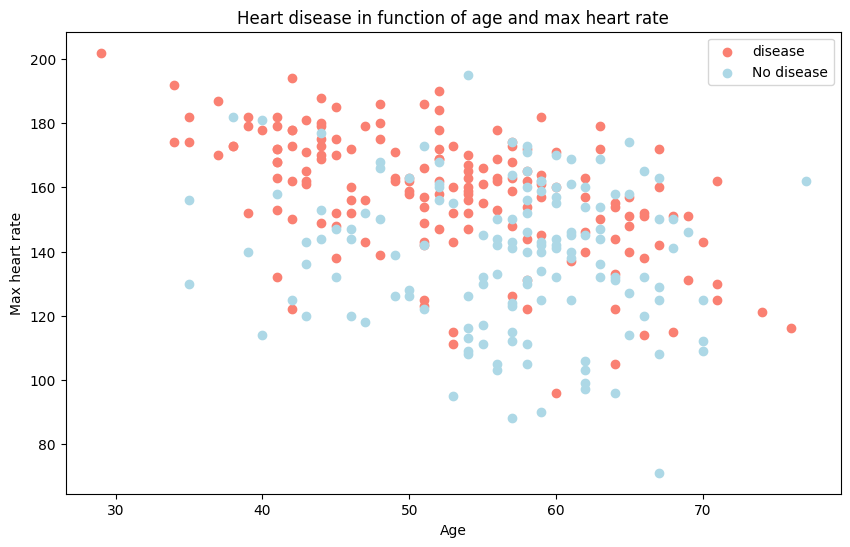

In [ ]:
# creating another figyure
plt.figure(figsize = (10,6))

#scatter with positive examples
plt.scatter(df.age[df.target == 1],df.thalach[df.target==1],c = "salmon")

#scatter with negative examples
plt.scatter(df.age[df.target == 0],df.thalach[df.target==0],c = "lightblue");

#adding some helpful info
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["disease","No disease"])

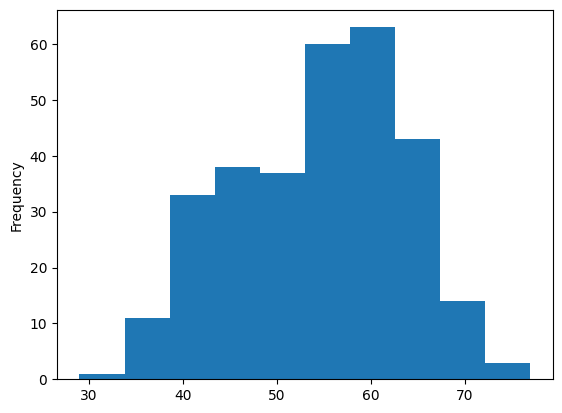

In [ ]:
#checking the distributon of the age columns with a histogram
df.age.plot.hist();

### heart disease Frequency per chest pain type

In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


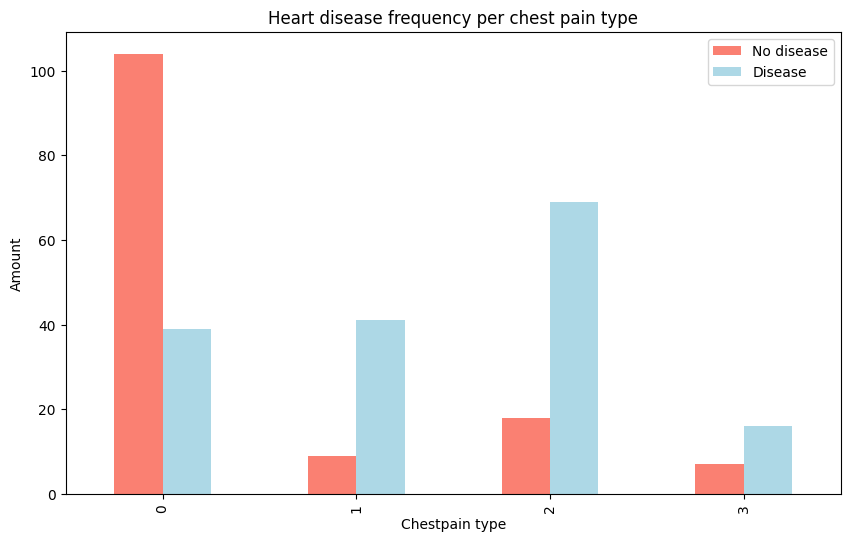

In [ ]:
#make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize = (10,6),
                                 color = ["salmon","lightblue"])

#add some communication

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chestpain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])

In [ ]:
### Let's Make a correlaton matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

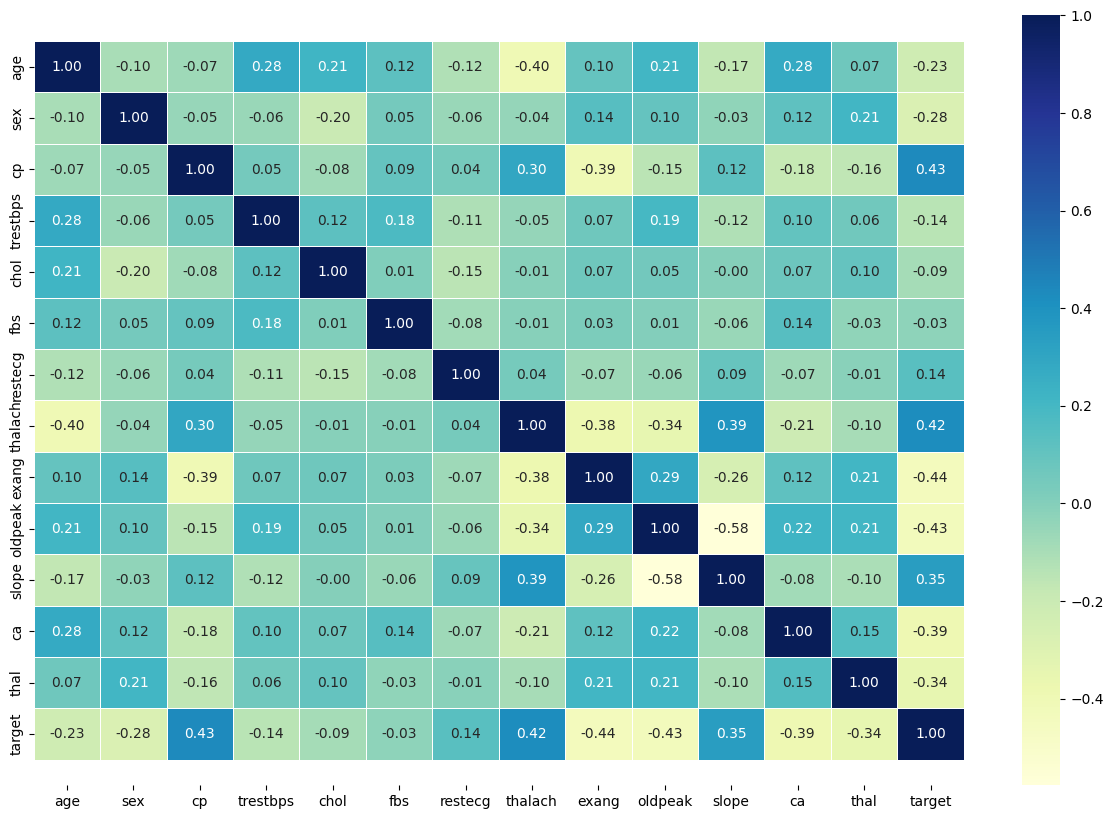

In [ ]:
#lets make out a correlation matrix visual
corr_matrix = df.corr()
fig, ax  = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

## MODELING

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# split data into x and y
X = df.drop("target",axis = 1)
y = df["target"]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# split data into train and test set
np.random.seed(42)

#split into train and test set
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data  into train and
test set now we have to build the model
we'll train it on the train set and
test it on the train test

We're going to try three different models
1. logistic regression
2. k nearest neighbors classifier
3. random forest classifier

In [ ]:
# putting models in a dicitonary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Creating a function to fit and score models
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models,
    models: a dictionary of different scikit-learn ML models,
    X_train : training data (no labels),
    X_test : test data (no labesl),
    y_train : training labels
    y_test : test labels
    """

    #set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name,model in models.items():
        #fit the model
        model.fit(X_train,y_train)
        #evaluate the model and append the score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Models Comparison

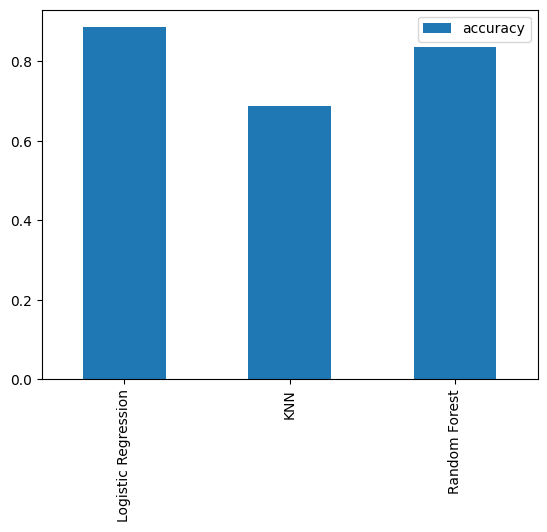

In [ ]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

## Tuning / Improving our model

Now we've got a baseline model and we know a model's first
predictions aren't always what we should based our next steps off.
so,

let's look at the following:
* hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross - validation
* Precison
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC curve)

### Hyperparameter tuning

In [ ]:
#Let's tune KNN

train_scores = []
test_scores = []

#Create a list of different values
neighbors = range(1,21)

#Setup KNN instance
knn  = KNeighborsClassifier()

#Loop through different n_neighbors
for i  in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the algorithm
    knn.fit(X_train,y_train)

    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    #update the test scores list
    test_scores.append(knn.score(X_test,y_test))


In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


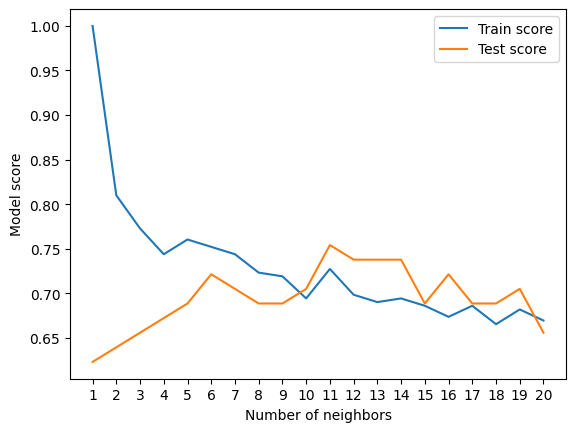

In [ ]:
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors,test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with randomsearchcv

we're goin to tune

* Logistic regression
* RandomForestClassifier

In [ ]:
#create a hyperparamter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

#create a hyperparammeter grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

NO we've got hyperparameters grid for our models
let's tune them using randomizedsearchCV

In [ ]:
#Tune Logisticregression

np.random.seed(42)

#setting up random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

#Fit random hyperpaarameter search model for logistciREgression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

NOw we've tuned Logistic regressin now its's tiem for RandomForrestCassifier

In [ ]:
#setup random seed
np.random.seed(42)

#setup hyperparater searc for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions = rf_grid,
                      cv =5,
                      n_iter = 20,
                      verbose = True)

#fit random hyperpapramter search model For RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
#find the best Hyperparamters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
#Evaluate the randomizedsearch RandomFOrestClassifier
rs_rf.score(X_test,y_test)

0.8688524590163934

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning using GridSearchCV

since out LOgisticRegression model provides the best score so far so we are gonna tune it using gridsearchCV

In [ ]:
# Different hyperparameters for our LogistcRegression
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#setup grid hyperparameter search for logistciRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv =5,
                         verbose = True)

#Fit the hyperparamter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#Evaluate  the tuned model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* Roc curve and AUC curve
* Confusion matrix
* classification report
* Precision
* Recall
* F1 score

In [ ]:
# make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)


In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

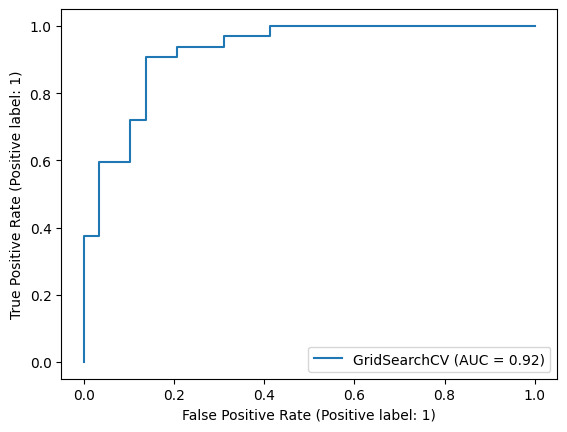

In [ ]:
# plot roc curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


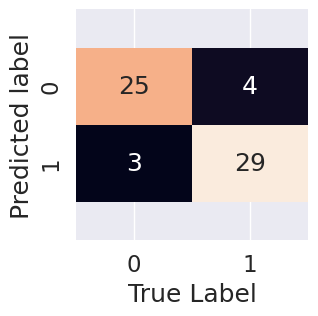

In [ ]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn's heatmnap()
    """
    fig, ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top -0.5)

plot_conf_mat(y_test, y_preds)

Now we've got a roc curve , an auc metric and confusion matrix,let's
get a classification report as well as cross-validation,recall and
f1 score

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross validation
we're going to calculate precison, f1 score, recall score  of our model using cross validation and to do so we'll be using cross_val_score()

In [ ]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

In [ ]:
#cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
#cross validated prescision
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "precision")

cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [ ]:
#cross validated recall
cv_rec = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "recall")

cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [ ]:
#cross validated f1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

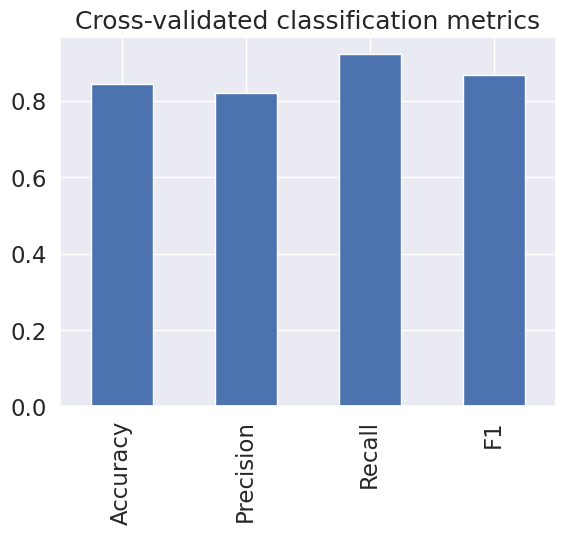

In [ ]:
#visualise cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_pre,
                          "Recall":cv_rec,
                          "F1":cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend = False);


## Finding the most important features

feature immportance is which features contributed most to the outcomes of the model and how did they contribute?

finding feature importance is different from all ML models

so lets find the feature importance for our logistic regression model

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# fit an instance of logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf1 = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

clf1.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# check coef_
clf1.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# match hte cooef's of features to columns
feature_dict = dict(zip(df.columns, list(clf1.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: title={'center': 'Feature Importance'}>

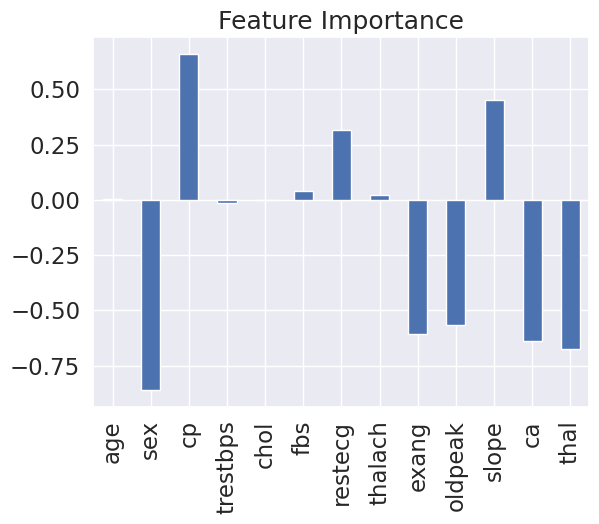

In [ ]:
#visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False)